In [7]:
import pandas as pd
import numpy as np

In [8]:
gossipcop_fake_df = pd.read_csv('dataset/gossipcop_fake.csv')
gossipcop_real_df = pd.read_csv('dataset/gossipcop_real.csv')

politifact_fake_df = pd.read_csv('dataset/politifact_fake.csv')
politifact_real_df = pd.read_csv('dataset/politifact_real.csv')

In [14]:
fake_df = pd.concat([gossipcop_fake_df, politifact_fake_df])
true_df = pd.concat([gossipcop_real_df, politifact_real_df])

fake_df.index = [x for x in range(len(gossipcop_fake_df) + len(politifact_fake_df))]
true_df.index = [x for x in range(len(gossipcop_real_df) + len(politifact_real_df))]

In [42]:
# add labels to both df
true_df['true'] = 1
fake_df['true'] = 0

# concat
df = pd.concat([true_df, fake_df])
display(df)

,id,news_url,title,tweet_ids,true
0,gossipcop-882573,https://www.brides.com/story/teen-mom-jenelle-...,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,912371411146149888\t912371528343408641\t912372...,1
1,gossipcop-875924,https://www.dailymail.co.uk/tvshowbiz/article-...,Kylie Jenner refusing to discuss Tyga on Life ...,901989917546426369\t901989992074969089\t901990...,1
2,gossipcop-894416,https://en.wikipedia.org/wiki/Quinn_Perkins,Quinn Perkins,931263637246881792\t931265332022579201\t931265...,1
3,gossipcop-857248,https://www.refinery29.com/en-us/2018/03/19192...,I Tried Kim Kardashian's Butt Workout & Am For...,868114761723936769\t868122567910936576\t868128...,1
4,gossipcop-884684,https://www.cnn.com/2017/10/04/entertainment/c...,Celine Dion donates concert proceeds to Vegas ...,915528047004209152\t915529285171122176\t915530...,1
...,...,...,...,...,...
5750,politifact14944,http://thehill.com/homenews/senate/369928-who-...,Who is affected by the government shutdown?,954602090462146560\t954602093171609600\t954650...,0
5751,politifact14071,https://web.archive.org/web/20170322070001/htt...,Lindsey Graham Threatens To Convert To Democra...,740351669834244096\t740391312277573632\t740474...,0
5752,politifact13577,http://archive.is/DQqCx,ELECTORAL COLLEGE ELECTOR COMMITS SUICIDE TO A...,810939651900907520\t814738996706164737\t814917...,0
5753,politifact13560,politicono.com/palin-calls-boycott-mall-americ...,Sarah Palin Calls To Boycott Mall Of America B...,805216591424212993\t805222830023540736\t805223...,0


In [43]:
# inspect length of news
titles = [text for text in df.title]

max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)
    
print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 23196
Max length of the titles: 53
Mean length of the titles: 11.161191584755992


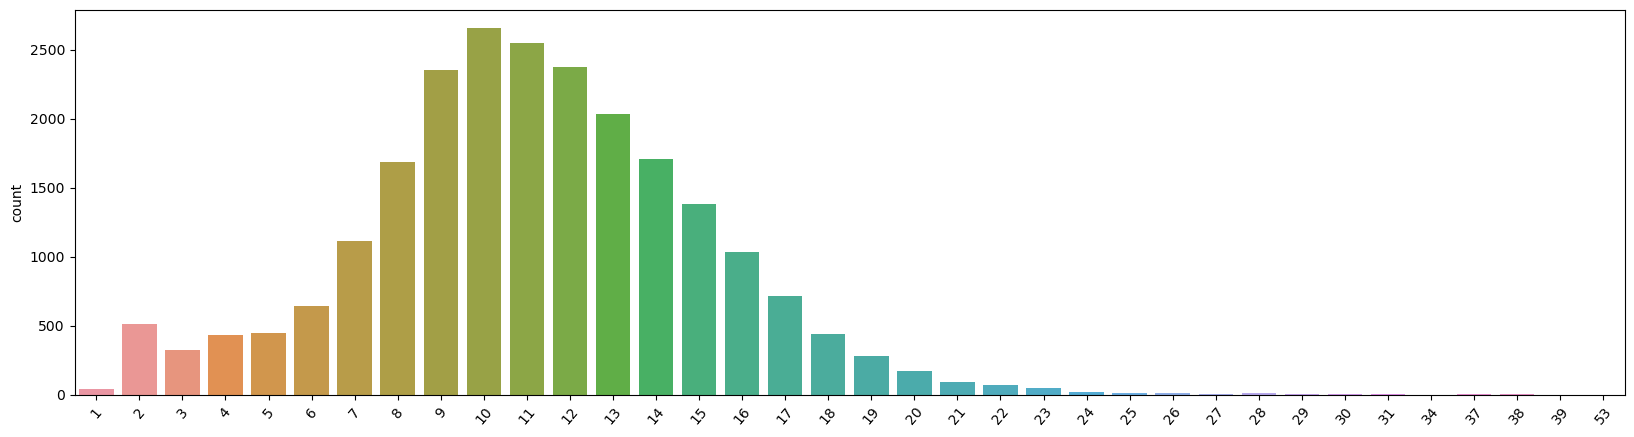

In [44]:
plt.figure(figsize=(20,5))
g = sns.countplot(x=titles_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

In [45]:
# purify and shuffle the DataFrame
from sklearn.utils import shuffle

# purify
df = df.iloc[:, [2,-1]]

# shuffle
df = shuffle(df).reset_index(drop=True)

display(df)

,title,true
0,7 Easy Hacks For Applying False Eyelashes Like...,1
1,Saturday Savings: Gigi Hadid Masters Athleisur...,1
2,Sen. Gregg: President Obama's Budget Proposal ...,1
3,George Takei Accused of Sexually Assaulting Fo...,1
4,Blake Shelton BURNS Luke Bryan for Offering to...,0
...,...,...
23191,This Photo Of Kanye West Kissing Saint Chicago...,1
23192,Jennifer Aniston's shock news: Pregnant and in...,0
23193,Pregnant Miranda Kerr has reportedly already s...,0
23194,Ariana Grande carried like a baby and 6 other ...,0


In [46]:
train_df = df.sample(frac=0.8)
val_df = df.drop(train_df.index)

# reset index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)

trainset size: (18557, 2)
valset size: (4639, 2)


In [51]:
# check for null titles
train_df['title'].isnull().sum()
val_df['title'].isnull().sum()

0

In [52]:
# DataFrame to csv
train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)